Process existed word list (from prototype spellchecker) from `total_word_dict.pickle` file

In [44]:
import pandas as pd
import re
import pymorphy2

In [45]:
PATH_TO_DICTIONARY_SOURCE_DIR = "../../data/dictionaries/source"
PATH_TO_OPENCORPORA_SOURCE_DICT = PATH_TO_DICTIONARY_SOURCE_DIR + "/existed_words_ru.txt"

In [46]:
with open(PATH_TO_OPENCORPORA_SOURCE_DICT) as file:
    data = file.read()

In [47]:
data_list = data.split(sep="\n")

In [48]:
data_list

['агроплемзавод',
 'прядущийся',
 'бенефициарий',
 'забряцать',
 'набросок',
 'визгливость',
 'узкосоциологический',
 'неоартроз',
 'индуизм',
 'фомы',
 'ширина',
 'отупи',
 'разгрызли',
 'сверхновый',
 'плодоноситься',
 'михельсона',
 'запойте',
 'отрыгивание',
 'тростящеюся',
 'подползшим',
 'фототрафарет',
 'застегнуло',
 'отекший',
 'нейрокутать',
 'поживиться',
 'лулео',
 'линкомицином',
 'эрудит',
 'бронную',
 'квела',
 'хемостерилизация',
 'простригшим',
 'оксицефалия',
 'очистка',
 'прикумчанин',
 'смердев',
 'ионик',
 'омерзение',
 'догкарт',
 'венкебаха',
 'приобретенное',
 'приобретение',
 'севанькаев',
 'попивать',
 'икавшему',
 'агастан',
 'корпускулярно-волновой',
 'баусов',
 'черпальщица',
 'свяченное',
 'спороться',
 'пятнящимися',
 'носовых',
 'плотик',
 'мудрые',
 'обязуя',
 'плацами',
 'грунтовой',
 'произнесемтесь',
 'алексаньянц',
 'обухом',
 'обыдёнщина',
 'обвернутыми',
 'ужены',
 'лейкоцитная',
 'зазеленеться',
 'чермака',
 'одеколонящем',
 'передневавшею',
 'гн

In [49]:
len(data_list)

421421

In [50]:
data_list = [word for word in data_list if not re.search("[^а-яА-Я]", word)]

In [51]:
len(data_list)

410072

In [52]:
existed_data = pd.DataFrame(data_list, columns=["word"])
existed_data.head()

,word
0,агроплемзавод
1,прядущийся
2,бенефициарий
3,забряцать
4,набросок


In [53]:
existed_data["length"] = existed_data.word.map(lambda x: len(x))

In [54]:
existed_data.head()

,word,length
0,агроплемзавод,13
1,прядущийся,10
2,бенефициарий,12
3,забряцать,9
4,набросок,8


<AxesSubplot:>

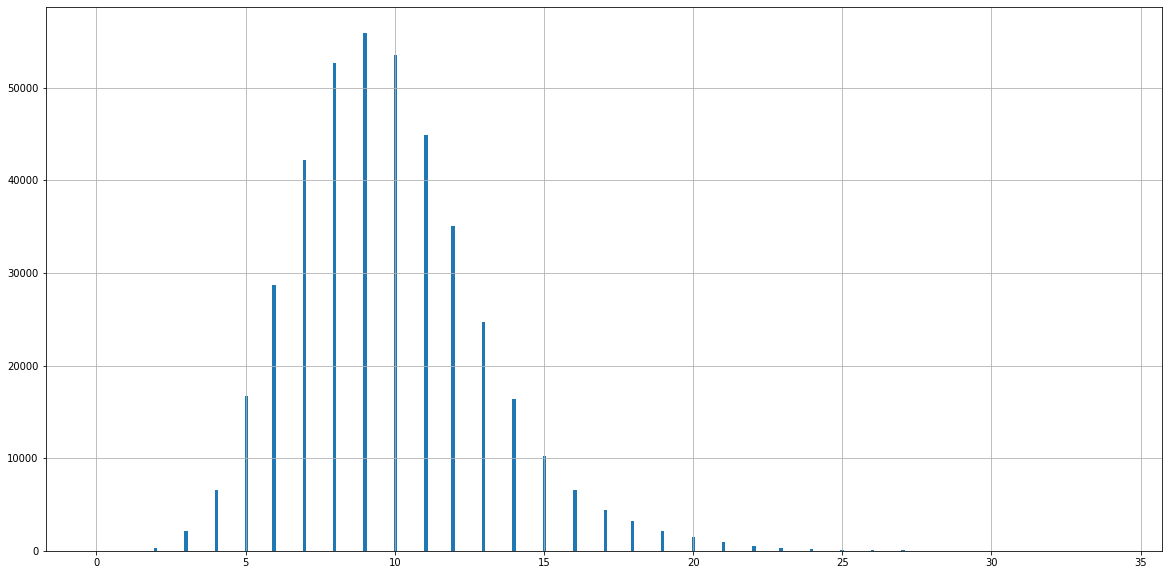

In [55]:
existed_data["length"].hist(bins=300, figsize=(20,10))

In [56]:
existed_data["length"].value_counts()

9     55918
10    53559
8     52702
11    44882
7     42173
12    35124
6     28761
13    24696
5     16752
14    16368
15    10194
4      6550
16     6521
17     4360
18     3168
19     2114
3      2089
20     1461
21      899
22      544
23      331
2       304
24      230
25      133
26       90
27       49
28       27
1        25
29       22
30       12
31        7
32        4
34        1
33        1
0         1
Name: length, dtype: int64

In [57]:
existed_data[existed_data["length"] == 0]

,word,length
410071,,0


In [58]:
existed_data = existed_data[existed_data["length"] != 0]

In [59]:
existed_data[existed_data["length"] == 1]

,word,length
1037,л,1
16912,с,1
26572,н,1
37472,ж,1
40982,э,1
47519,а,1
60740,ы,1
65380,х,1
94085,к,1
117486,в,1


In [60]:
existed_data = existed_data[existed_data["length"] != 1]

In [61]:
existed_data[existed_data["length"] == 2]

,word,length
4079,ст,2
6246,га,2
6428,уп,2
11534,оа,2
13672,яд,2
...,...,...
400511,ее,2
401632,св,2
402216,уф,2
405781,юз,2


In [62]:
existed_data[existed_data["length"] > 30]

,word,length
87880,средневолжсксельэлектросетьстрой,32
105254,белгородоблгражданреконструкция,31
107676,волгограднефтепродуктавтоматика,31
117663,спецнефтеэнергомонтажавтоматика,31
150937,архангельскагропромпусконаладка,31
172350,никотинамидадениндинуклеотидфосфат,34
197565,магнитотермокондуктометрический,31
204476,энцефаломиелополирадикулоневрит,31
242647,аркадакагропроммехмонтажкомплект,32
286609,полидезоксирибонуклеотидсинтетаза,33


In [63]:
existed_data.shape

(410046, 2)

In [64]:
existed_data = existed_data.drop(columns=["length"])

In [65]:
existed_data.to_csv("../../data/dictionaries/processed/processed_existed_words.txt", header=None, index=None, sep=' ', mode='a')

In [66]:
lemmatizer = pymorphy2.MorphAnalyzer()
existed_data = pd.DataFrame(set(existed_data.word.map(lambda word: lemmatizer.parse(word)[0].normal_form)), columns=["word"])

In [67]:
existed_data.head()

,word
0,ножик
1,пригнать
2,востокэнерго
3,спасть
4,дослушиваться


In [68]:
existed_data.to_csv("../../data/dictionaries/processed/processed_lemmatized_existed_words.txt", header=None, index=None, sep=' ', mode='a')